In [23]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [27]:
df = pd.read_csv("merged_battery_data.csv")
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Time_diff,Charge_Ah,Cumulative_Capacity_Ah,Current_load,Voltage_load
0,3.733111,0.002139,12.633286,-0.0006,0.002,0.000,0.000,0.000000,0.000000,NaN,NaN
1,3.912614,1.491411,12.586211,1.4995,4.783,2.485,2.485,0.001029,0.001029,NaN,NaN
2,3.926494,1.493167,12.495033,1.4995,4.808,8.266,5.781,0.002398,0.003427,NaN,NaN
3,3.936090,1.491712,12.448769,1.4995,4.808,14.063,5.797,0.002402,0.005829,NaN,NaN
4,3.943972,1.492293,12.294811,1.4995,4.808,19.891,5.828,0.002416,0.008245,NaN,NaN


In [29]:
data = df.drop(columns=['Current_load', 'Voltage_load'])
data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Time_diff,Charge_Ah,Cumulative_Capacity_Ah
0,3.733111,0.002139,12.633286,-0.0006,0.002,0.000,0.000,0.000000,0.000000
1,3.912614,1.491411,12.586211,1.4995,4.783,2.485,2.485,0.001029,0.001029
2,3.926494,1.493167,12.495033,1.4995,4.808,8.266,5.781,0.002398,0.003427
3,3.936090,1.491712,12.448769,1.4995,4.808,14.063,5.797,0.002402,0.005829
4,3.943972,1.492293,12.294811,1.4995,4.808,19.891,5.828,0.002416,0.008245


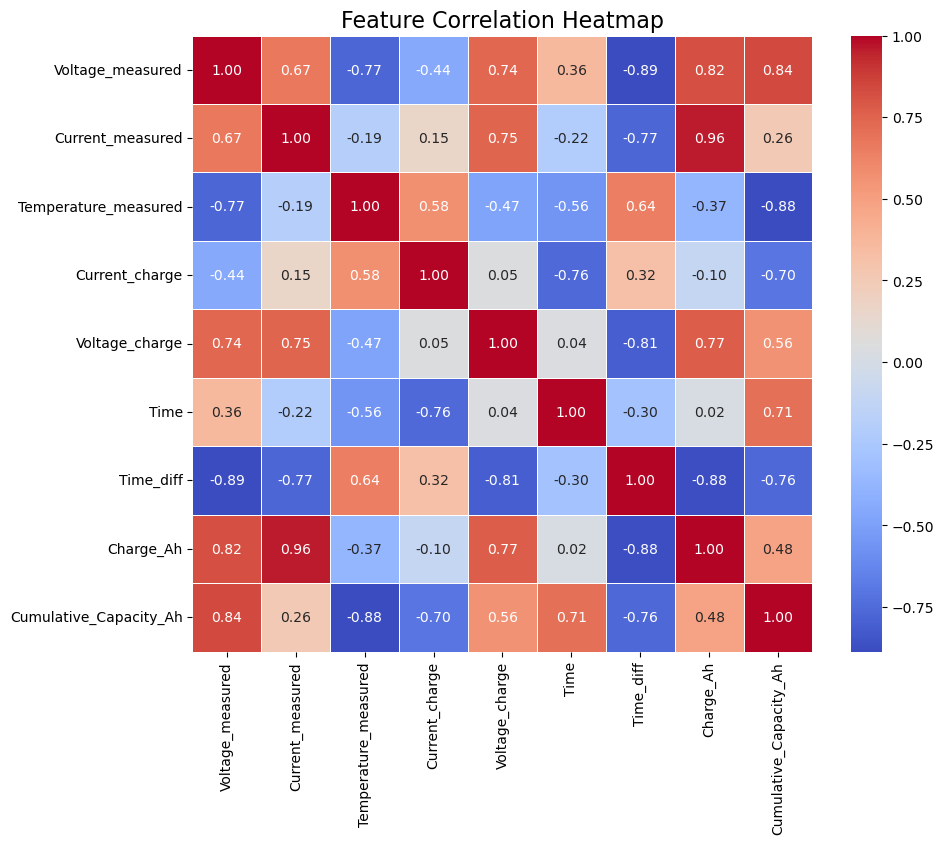

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
X = data.drop(columns=['Cumulative_Capacity_Ah'])  
y = data['Cumulative_Capacity_Ah'] 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
print(X_test)

      Voltage_measured  Current_measured  Temperature_measured  \
5617          4.158158          1.467064              8.535834   
1760          3.645883         -1.988002              8.206921   
4666          4.212825          0.150906              5.631966   
4808          4.211283          0.106687              5.324084   
1425          4.214367          0.058439              5.587544   
...                ...               ...                   ...   
438           4.210885          0.500740              6.843694   
2465          4.210606          0.333907              5.947346   
2580          4.209929          0.246204              6.554414   
434           4.210237          0.501218              6.829235   
751           4.212364          0.222902              6.440021   

      Current_charge  Voltage_charge      Time  Time_diff  Charge_Ah  
5617          1.4744           4.998   640.532      5.719   0.002331  
1760          1.9990           2.524   242.062     12.875  -0.007

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [63]:

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100


In [65]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 0.0032672163984835668
R-squared (R²) Score: 0.9955228652746286
Model Accuracy: 99.55%


In [67]:

new_data = [[3.9, 1.5, 12.5, 1.49, 4.8, 10.0, 5.0, 0.002]]  
new_data_scaled = scaler.transform(new_data)
predicted_capacity = model.predict(new_data_scaled)
print(f"Predicted Battery Capacity: {predicted_capacity[0]} Ah")


Predicted Battery Capacity: 0.0034129190900000017 Ah


C:\Users\91883\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  


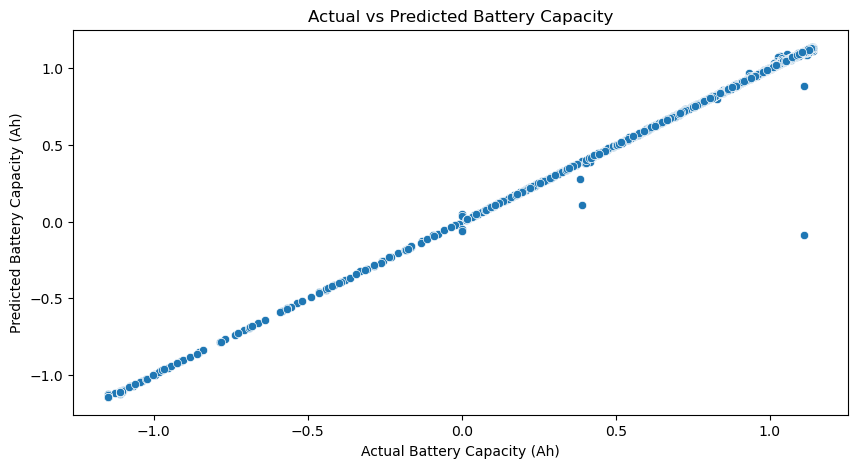

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Battery Capacity (Ah)")
plt.ylabel("Predicted Battery Capacity (Ah)")
plt.title("Actual vs Predicted Battery Capacity")
plt.show()